# **<span style="color:yellow;">UK Dataset: Exploratory Data Analysis</span>**

## **Purpose of Notebook**
Conducting a EDA analysis on the loaded and cleaned data, checking numerical stats, distributions, target analysis and geographical views

---

**Import Neccessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import prettytable
from collections import Counter
## Display all the columns of the dataframe


import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import numpy as np
import plotly.express as px

**Load the cleaned Datasets**

In [2]:
# US Dataset
US_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/US-cleaned_data.csv')
US_data.head()


Report ID  Report Version           Make  Model  Model Year ADS Equipped?  \
0  10003-2800               4  International     LT      2022.0            No   
1  10003-2932               1  International     LT      2022.0           Yes   
2  10003-3210               1  International  LT625      2021.0           Yes   
3  10003-4179               1  International     LT      2022.0            No   
4  10003-6050               2  International  LT625      2022.0            No   

  Automation System Engaged? Incident Date Incident Time (24:00)  \
0     Unknown, see Narrative    2025-11-21              19:57:00   
1     Unknown, see Narrative    2021-11-05              19:57:00   
2     Unknown, see Narrative    2022-04-05              15:52:00   
3                       ADAS    2025-10-22              15:09:00   
4     Unknown, see Narrative    2025-12-22              08:20:00   

                 City  ...       Roadway Type Roadway Surface  \
0  Maxatawny Tounship  ...             Street             Dry   
1  Maxatawny Township  ...             Street             Dry   
2              Tucson  ...  Highway / Freeway             Dry   
3             Missing  ...  Highway / Freeway             Dry   
4      Natural Bridge  ...  Highway / Freeway             Dry   

  Posted Speed Limit (MPH)            Lighting          Crash With  \
0                     25.0  Dark - Not Lighted  Other Fixed Object   
1                     25.0  Dark - Not Lighted  Other Fixed Object   
2                     65.0            Daylight  Other Fixed Object   
3                     65.0            Daylight       Passenger Car   
4                     70.0            Daylight  Other Fixed Object   

  Highest Injury Severity Alleged SV Pre-Crash Movement  Weather  \
0                         Unknown   Proceeding Straight  Missing   
1                         Unknown   Proceeding Straight  Missing   
2            No Injuries Reported   Proceeding Straight    Clear   
3                         Unknown   Proceeding Straight    Clear   
4            No Injuries Reported   Proceeding Straight    Clear   

                  SV Contact Area Country  
0                           Front      US  
1                           Front      US  
2                           Front      US  
3                           Front      US  
4  Back, Front, Nearside, Offside      US  

[5 rows x 21 columns]

In [3]:
# UK Dataset
UK_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/UK-cleaned_data.csv')
UK_data.head()


Report ID Report Version Highest Injury Severity Alleged Incident Date  \
0  2019010155206       10155206                           Minor    2019-01-01   
1  2019010155217       10155217                         Serious    2019-01-01   
2  2019010155425       10155425                           Minor    2019-01-02   
3  2019010156538       10156538                           Minor    2019-01-08   
4  2019010156721       10156721                         Serious    2019-01-10   

  Incident Time (24:00)        Roadway Type  Posted Speed Limit (MPH)  \
0              01:15:00  Single carriageway                      30.0   
1              04:10:00    Dual carriageway                      40.0   
2              15:07:00  Single carriageway                      20.0   
3              21:20:00  Single carriageway                      20.0   
4              08:20:00    Dual carriageway                      30.0   

         Lighting Weather     Roadway Surface  ...          Crash With  \
0  Dark - Lighted   Clear  Single carriageway  ...                 NaN   
1  Dark - Lighted   Clear    Dual carriageway  ...  Other Fixed Object   
2        Daylight   Clear  Single carriageway  ...                 NaN   
3  Dark - Lighted   Clear  Single carriageway  ...                 NaN   
4        Daylight   Clear    Dual carriageway  ...                 NaN   

  SV Contact Area            City           State         Country      Make  \
0           Front  Chadwell Heath  Greater London  United Kingdom    SUZUKI   
1           Front          Ilford  Greater London  United Kingdom   HYUNDAI   
2           Front   Stamford Hill  Greater London  United Kingdom  MERCEDES   
3           Front       Goodmayes  Greater London  United Kingdom    TOYOTA   
4           Front   South Norwood  Greater London  United Kingdom      AUDI   

     Model Model Year  ADS Equipped? Automation System Engaged?  
0    SWIFT     2015.0   Conventional               Conventional  
1      I30     2015.0   Conventional               Conventional  
2  C CLASS     2018.0   Conventional               Conventional  
3  AVENSIS     2005.0   Conventional               Conventional  
4       A4     2017.0   Conventional               Conventional  

[5 rows x 21 columns]

**Make Sure columns are the same**

In [4]:
# Printing all columns for both datasets
print("Columns in UK_data:")
print(UK_data.columns)

print("\nColumns in US_data:")
print(US_data.columns)

# Checking if both datasets have the same number of rows and columns
print("\nShape of UK_data:", UK_data.shape)
print("Shape of US_data:", US_data.shape)


Columns in UK_data:
Index(['Report ID', 'Report Version', 'Highest Injury Severity Alleged',
       'Incident Date', 'Incident Time (24:00)', 'Roadway Type',
       'Posted Speed Limit (MPH)', 'Lighting', 'Weather', 'Roadway Surface',
       'SV Pre-Crash Movement', 'Crash With', 'SV Contact Area', 'City',
       'State', 'Country', 'Make', 'Model', 'Model Year', 'ADS Equipped?',
       'Automation System Engaged?'],
      dtype='object')

Columns in US_data:
Index(['Report ID', 'Report Version', 'Make', 'Model', 'Model Year',
       'ADS Equipped?', 'Automation System Engaged?', 'Incident Date',
       'Incident Time (24:00)', 'City', 'State', 'Roadway Type',
       'Roadway Surface', 'Posted Speed Limit (MPH)', 'Lighting', 'Crash With',
       'Highest Injury Severity Alleged', 'SV Pre-Crash Movement', 'Weather',
       'SV Contact Area', 'Country'],
      dtype='object')

Shape of UK_data: (232365, 21)
Shape of US_data: (4372, 21)


**Split the Numerical and Catergorical Columns**

In [5]:
# Identify numerical and categorical columns
numerical_columns = ['Posted Speed Limit (MPH)']
catergorical_columns = [
    'Make', 'Model', 'Model Year', 'ADS Equipped?',
    'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface',
    'Roadway Surface', 'Lighting', 'Crash With', 'Highest Injury Severity Alleged',
    'SV Pre-Crash Movement', 'SV Contact Area', 'Weather', 'Country'
]
datetime_columns = ['Incident Date', 'Incident Time (24:00)']
indexing_columns = ['Report ID', 'Report Version']

**Missing Values**

In [6]:
from prettytable import PrettyTable

# Function to calculate and display missing values
def display_missing_values(dataset, dataset_name):
    features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
    
    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["Feature", "Percentage of Missing Values"]
    
    for feature in features_with_na:
        missing_percentage = np.round(dataset[feature].isnull().mean() * 100, 2)
        table.add_row([feature, f"{missing_percentage} %"])
    
    print(f"Missing Values in {dataset_name}:")
    print(table)

# Check missing values for both datasets
display_missing_values(UK_data, "UK Dataset")
display_missing_values(US_data, "US Dataset")

Missing Values in UK Dataset:
+------------+------------------------------+
|  Feature   | Percentage of Missing Values |
+------------+------------------------------+
| Crash With |           92.01 %            |
|   Model    |            1.11 %            |
+------------+------------------------------+
Missing Values in US Dataset:
+--------------------------+------------------------------+
|         Feature          | Percentage of Missing Values |
+--------------------------+------------------------------+
|        Model Year        |            0.32 %            |
|      Incident Date       |            0.43 %            |
|  Incident Time (24:00)   |            4.6 %             |
| Posted Speed Limit (MPH) |           11.34 %            |
+--------------------------+------------------------------+


**Are Missing Values correlated with the target variable - severity**

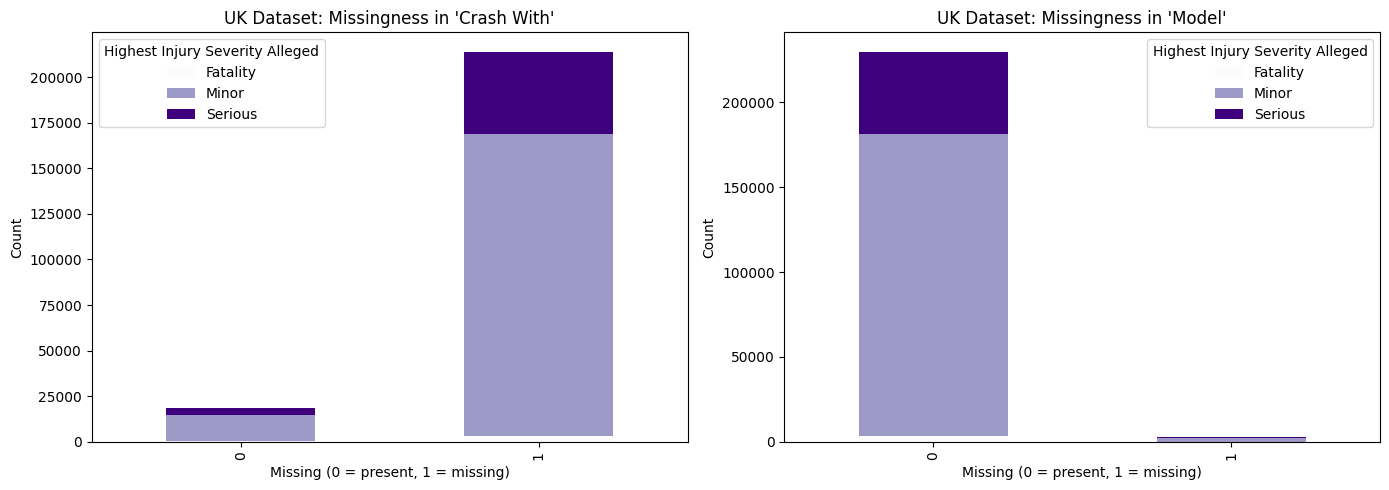

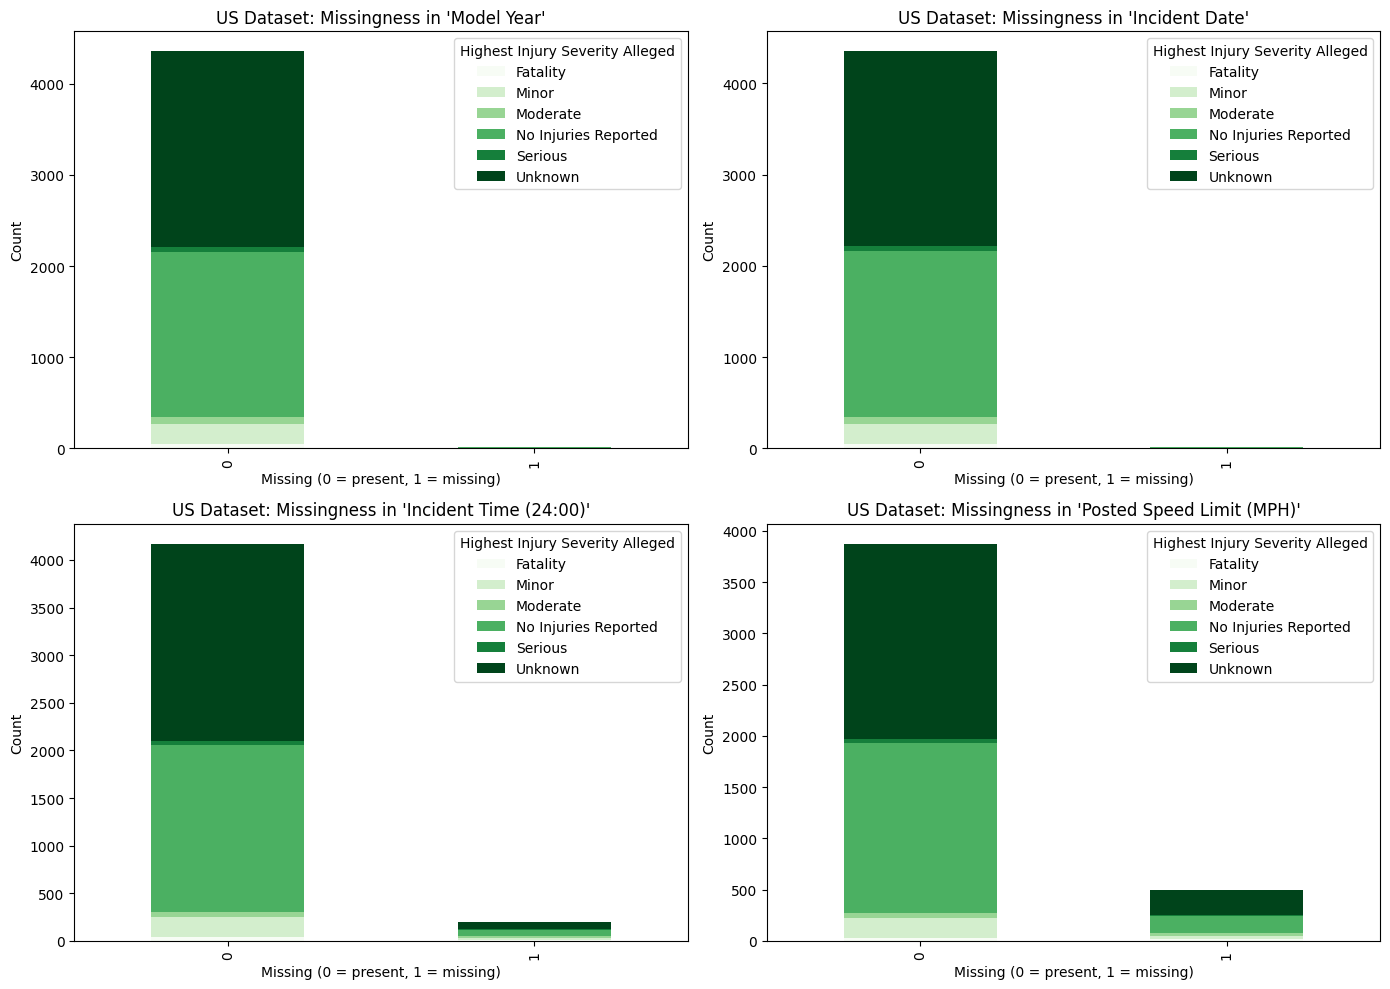

In [7]:

def plot_missing_correlation(dataset, dataset_name, target_variable, color_map):
    features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]
    num_features = len(features_with_na)

    # Set up the grid layout: 2 columns
    cols = 2
    rows = (num_features + cols - 1) // cols  # Ensure all plots fit
    fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(features_with_na):
        data = dataset.copy()
        data[feature + "_missing"] = np.where(data[feature].isnull(), 1, 0)

        # Group by missing flag and target variable
        grouped = data.groupby([feature + "_missing", target_variable]).size().unstack(fill_value=0)

        # Plot stacked bar chart
        grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap=color_map)
        axes[i].set_title(f"{dataset_name}: Missingness in '{feature}'")
        axes[i].set_xlabel("Missing (0 = present, 1 = missing)")
        axes[i].set_ylabel("Count")

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_missing_correlation(UK_data, "UK Dataset", "Highest Injury Severity Alleged", color_map="Purples")
plot_missing_correlation(US_data, "US Dataset", "Highest Injury Severity Alleged", color_map="Greens")


Amount of missing is very low for both, however it is dependent hence we need to replace these nan values with something more meaningful in the feature engineering section

## **<span style="color:#CCCCFF;">Numerical Values</span>**


In [8]:
def show_numerical_features(dataset, dataset_name):
    print(f"\n{dataset_name}")
    print(f"Number of numerical variables: {len(numerical_columns)}")
    print("Preview of numerical variables:")
    print(dataset[numerical_columns].head())


# Apply to both datasets
show_numerical_features(UK_data, "UK Dataset")
show_numerical_features(US_data, "US Dataset")




UK Dataset
Number of numerical variables: 1
Preview of numerical variables:
   Posted Speed Limit (MPH)
0                      30.0
1                      40.0
2                      20.0
3                      20.0
4                      30.0

US Dataset
Number of numerical variables: 1
Preview of numerical variables:
   Posted Speed Limit (MPH)
0                      25.0
1                      25.0
2                      65.0
3                      65.0
4                      70.0


UK report version is not a numerical value as it is a string with chars not numbers only
* Catergorical = Model Year, Report Version (uneccessary)
* Discrete = posted speed limit

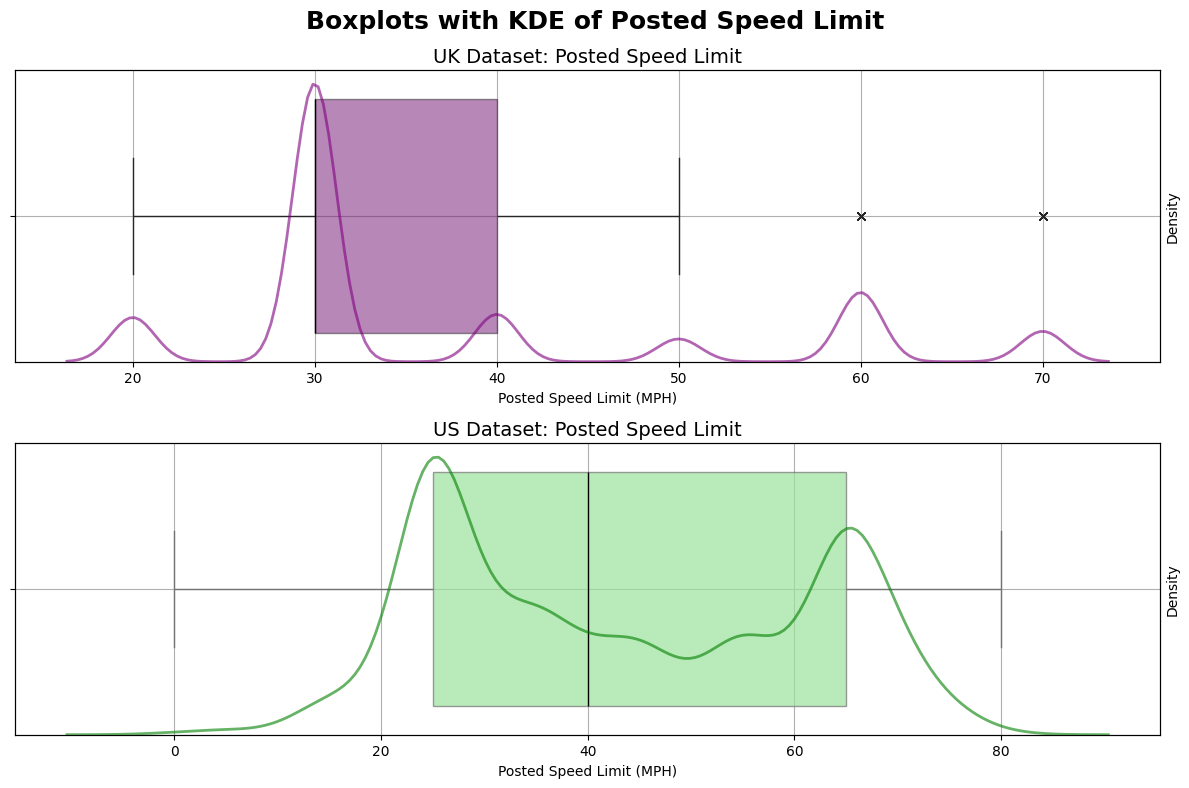

In [9]:

def plot_posted_speed_limit_boxplots(UK_data, US_data):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
    
    # UK plot – pastel purple boxplot
    sns.boxplot(data=UK_data, x='Posted Speed Limit (MPH)', color='purple',
                ax=axes[0], flierprops=dict(marker='x', markersize=6),
                boxprops=dict(alpha=0.5), medianprops=dict(color='black'))
    axes[0].set_title("UK Dataset: Posted Speed Limit", fontsize=14)
    axes[0].grid(True)
    
    # UK KDE overlay on secondary y-axis
    ax2_uk = axes[0].twinx()
    sns.kdeplot(UK_data['Posted Speed Limit (MPH)'].dropna(), color='purple', alpha=0.6, lw=2, ax=ax2_uk)
    ax2_uk.set_ylabel('Density', fontsize=10)
    ax2_uk.grid(False)
    ax2_uk.set_yticks([])
    
    # US plot – pastel mint green boxplot
    sns.boxplot(data=US_data, x='Posted Speed Limit (MPH)', color='lightgreen',
                ax=axes[1], flierprops=dict(marker='x', markersize=6),
                boxprops=dict(alpha=0.7), medianprops=dict(color='black'))
    axes[1].set_title("US Dataset: Posted Speed Limit", fontsize=14)
    axes[1].grid(True)
    
    # US KDE overlay on secondary y-axis
    ax2_us = axes[1].twinx()
    sns.kdeplot(US_data['Posted Speed Limit (MPH)'].dropna(), color='green', alpha=0.6, lw=2, ax=ax2_us)
    ax2_us.set_ylabel('Density', fontsize=10)
    ax2_us.grid(False)
    ax2_us.set_yticks([])
    
    # Super title
    plt.suptitle("Boxplots with KDE of Posted Speed Limit", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Call the function
plot_posted_speed_limit_boxplots(UK_data, US_data)


## **<span style="color:#CCCCFF;">Catergorical Values</span>**

**KDE and Histograms**

* Too many values taking more than 30mins for the UK dataset hence only plotting top 20 
* counter method for SV contact as multi answers

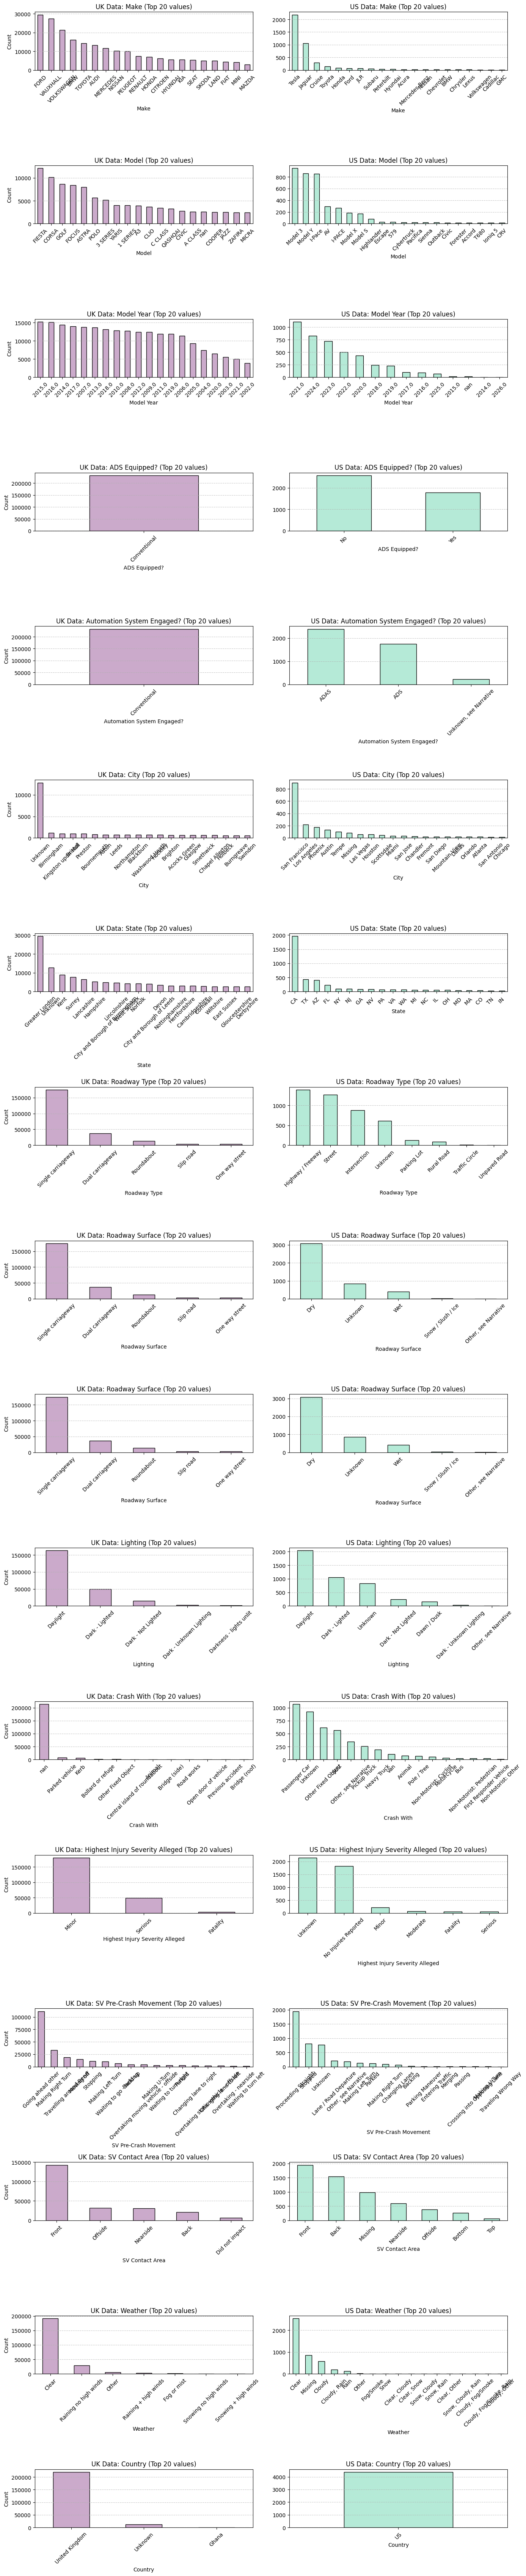

In [21]:

fig, axes = plt.subplots(len(catergorical_columns), 2, figsize=(14, len(catergorical_columns)*4), sharey=False)

if len(catergorical_columns) == 1:
    axes = axes.reshape(1, 2)

for idx, column in enumerate(catergorical_columns):
    if column not in UK_data.columns:
        print(f"Warning: '{column}' not in UK data columns. Skipping.")
        continue
    if column not in US_data.columns:
        print(f"Warning: '{column}' not in US data columns. Skipping.")
        continue
    
    # UK Data bar plot - top 20 values
    uk_counts = UK_data[column].value_counts(dropna=False).head(20)
    uk_counts.plot(kind='bar', ax=axes[idx, 0], color='#CBAACB',edgecolor='black')  # pastel purple
    axes[idx, 0].set_title(f'UK Data: {column} (Top 20 values)')
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel('Count')
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # US Data bar plot - top 20 values
    if column == 'SV Contact Area':
        area_series = US_data[column].dropna()
        all_areas = []
        for val in area_series:
            parts = [part.strip() for part in val.split(',')]
            all_areas.extend(parts)
        area_counts = Counter(all_areas)
        area_counts_df = pd.Series(area_counts).sort_values(ascending=False).head(20)
        area_counts_df.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')  # pastel green
    else:
        us_counts = US_data[column].value_counts(dropna=False).head(20)
        us_counts.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')  # pastel green

    axes[idx, 1].set_title(f'US Data: {column} (Top 20 values)')
    axes[idx, 1].set_xlabel(column)
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## **<span style="color:#CCCCFF;">Time Series Values</span>**

**Radial Time Series Data**

/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_7621/111062564.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Incident Time (24:00)'] = pd.to_datetime(df['Incident Time (24:00)'], errors='coerce').dt.hour
/var/folders/0k/whv99z5n5rnb1xp8n07krpcw0000gn/T/ipykernel_7621/111062564.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Incident Time (24:00)'] = pd.to_datetime(df['Incident Time (24:00)'], errors='coerce').dt.hour


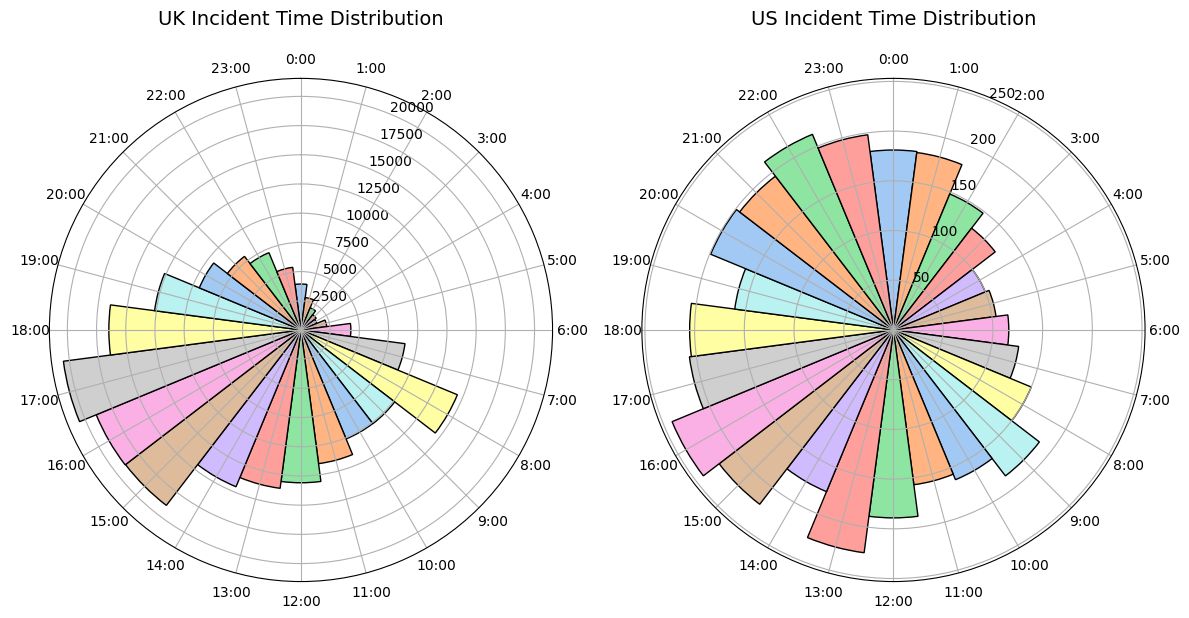

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_incident_time_radial_side_by_side(UK_data, US_data):
    # Make sure Incident Time is datetime or extract hour as integer
    for df in [UK_data, US_data]:
        if 'Incident Time (24:00)' in df.columns:
            # Try to convert to datetime, extract hour
            if not pd.api.types.is_datetime64_any_dtype(df['Incident Time (24:00)']):
                df['Incident Time (24:00)'] = pd.to_datetime(df['Incident Time (24:00)'], errors='coerce').dt.hour
            else:
                df['Incident Time (24:00)'] = df['Incident Time (24:00)'].dt.hour

    # Prepare counts of hours 0-23 for UK
    uk_hours = UK_data['Incident Time (24:00)'].dropna().astype(int)
    uk_counts = uk_hours.value_counts().reindex(range(24), fill_value=0).sort_index()

    # Prepare counts of hours 0-23 for US
    us_hours = US_data['Incident Time (24:00)'].dropna().astype(int)
    us_counts = us_hours.value_counts().reindex(range(24), fill_value=0).sort_index()

    hours = range(24)
    theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)
    width = 2 * np.pi / 24

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': 'polar'})

    colors = sns.color_palette('pastel', 24)

    # UK plot
    axes[0].bar(theta, uk_counts, width=width, bottom=0.0, color=colors, edgecolor='black')
    axes[0].set_theta_zero_location("N")
    axes[0].set_theta_direction(-1)
    axes[0].set_xticks(theta)
    axes[0].set_xticklabels([f'{h}:00' for h in hours])
    axes[0].set_title('UK Incident Time Distribution', fontsize=14, pad=20)

    # US plot
    axes[1].bar(theta, us_counts, width=width, bottom=0.0, color=colors, edgecolor='black')
    axes[1].set_theta_zero_location("N")
    axes[1].set_theta_direction(-1)
    axes[1].set_xticks(theta)
    axes[1].set_xticklabels([f'{h}:00' for h in hours])
    axes[1].set_title('US Incident Time Distribution', fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()

plot_incident_time_radial_side_by_side(UK_data, US_data)


**Month and Year Data**

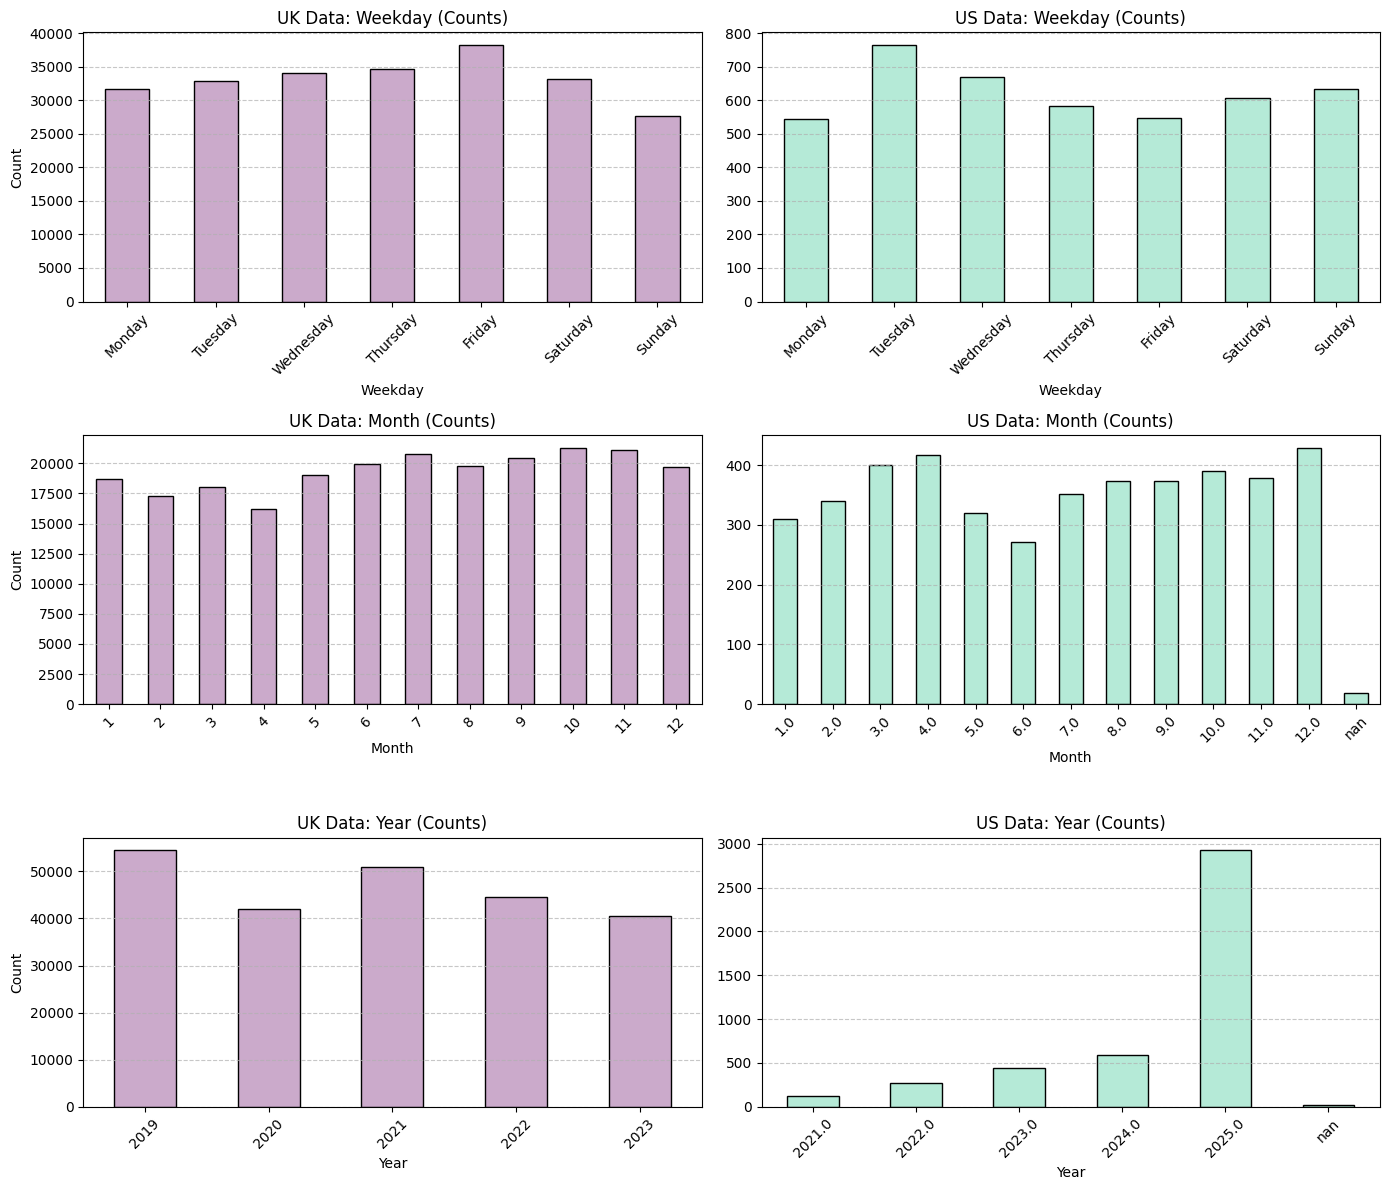

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_weekday_month_year_side_by_side(UK_data, US_data):
    # Convert Incident Date to datetime if needed
    for df in [UK_data, US_data]:
        if 'Incident Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Incident Date']):
            df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')

        # Extract weekday name
        if 'Weekday' not in df.columns:
            df['Weekday'] = df['Incident Date'].dt.day_name()
        # Extract month and year as before
        if 'Month' not in df.columns:
            df['Month'] = df['Incident Date'].dt.month
        if 'Year' not in df.columns:
            df['Year'] = df['Incident Date'].dt.year

    time_columns = ['Weekday', 'Month', 'Year']

    fig, axes = plt.subplots(len(time_columns), 2, figsize=(14, len(time_columns)*4), sharey=False)
    if len(time_columns) == 1:
        axes = axes.reshape(1, 2)

    for idx, column in enumerate(time_columns):
        # UK plot
        uk_counts = UK_data[column].value_counts(dropna=False)
        if column == 'Weekday':
            # Reorder weekdays for better readability
            weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            uk_counts = uk_counts.reindex(weekdays_order).fillna(0)
        else:
            uk_counts = uk_counts.sort_index()

        uk_counts.plot(kind='bar', ax=axes[idx, 0], color='#CBAACB',edgecolor='black')
        axes[idx, 0].set_title(f'UK Data: {column} (Counts)')
        axes[idx, 0].set_xlabel(column)
        axes[idx, 0].set_ylabel('Count')
        axes[idx, 0].tick_params(axis='x', rotation=45)
        axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.7)

        # US plot
        us_counts = US_data[column].value_counts(dropna=False)
        if column == 'Weekday':
            us_counts = us_counts.reindex(weekdays_order).fillna(0)
        else:
            us_counts = us_counts.sort_index()

        us_counts.plot(kind='bar', ax=axes[idx, 1], color='#B5EAD7',edgecolor='black')
        axes[idx, 1].set_title(f'US Data: {column} (Counts)')
        axes[idx, 1].set_xlabel(column)
        axes[idx, 1].tick_params(axis='x', rotation=45)
        axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Usage:
plot_weekday_month_year_side_by_side(UK_data, US_data)
